# 1. Agriculture & Food Production - Wikipedia WebPage

For Web Scraping I’m using tools such as Beautiful Soup extract the relevant data from the web page. For this dataset I’m performing to find the Top 10 common words with their frequency that is used in the Website. 


# Importing Libraries

In [1]:
import requests
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

Downloading the "punkt" and "stopwords" corpus from the Natural Language Toolkit (NLTK) library in Python.

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Retrieve webpage content

In [4]:
url = "https://en.wikipedia.org/wiki/Food_and_Agriculture_Organization"
response = requests.get(url)
content = response.text

# Parse HTML content and extract text

In [5]:
soup = BeautifulSoup(content, "html.parser")
text = soup.get_text()

# Remove non-alphabetic characters and convert to lowercase

In [6]:
text = re.sub(r"[^a-zA-Z ]", "", text.lower())

# Tokenize text into words and remove stop words

In [7]:
tokens = word_tokenize(text)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if not word in stop_words]

# Create frequency distribution of words

In [8]:
fdist = FreqDist(filtered_tokens)

# Get 10 most common words and their frequencies

In [9]:
common_words = fdist.most_common(10)
df = pd.DataFrame(common_words, columns=["words", "frequency"])
print(df)

           words  frequency
0           food        141
1            fao        141
2        nations         79
3   organization         75
4    agriculture         72
5      retrieved         68
6          world         52
7         united         48
8  international         47
9        october         42


# Visualizing using the bar plot

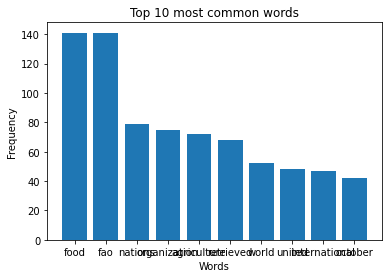

In [10]:
plt.bar(range(len(common_words)), [val[1] for val in common_words], align='center')
plt.xticks(range(len(common_words)), [val[0] for val in common_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 most common words')
plt.show()

# 2. Beyond climate-smart agriculture (PDF file)
Using the Python PyPDF2 module, I'm extracting the text from the pdf file. For this PDF file I'm identifying the top areas where food safety has to be improved.

# Importing Libraries

Installing the PyPDF2 module

In [11]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 2.6 MB/s eta 0:00:00


In [12]:
import re
import PyPDF2
import collections
from collections import Counter
import matplotlib.pyplot as plt

# Open the PDF file and extract the text

In [14]:
pdf_file = open('2048-7010-2-12.pdf', 'rb')
pdf_reader = PyPDF2.PdfReader(pdf_file)
text_data = pdf_reader.pages[0].extract_text()

# Preprocess and tokenize the text data

In [15]:
text_data = re.sub(r'\W+', ' ', text_data)  # Remove all non-word characters
tokens = text_data.lower().split()  # Convert to lowercase and split into words

# Perform frequency analysis

In [16]:
freq_count = Counter(tokens)

# Group relevant keywords connected to food safety into topic groups

In [17]:
cleanliness_keywords = ['cleanliness', 'sanitation', 'hygiene', 'disinfection','current','agendas']
training_keywords = ['employee training', 'food handling training', 'food safety training']
temperature_keywords = ['temperature control', 'cooking temperatures', 'food storage temperatures']
traceability_keywords = ['product traceability', 'record keeping', 'audit trail']

topic_groups = {'cleanliness and sanitation': cleanliness_keywords,
                'employee training and education': training_keywords,
                'temperature control': temperature_keywords,
                'product traceability and record keeping': traceability_keywords}

# Determine the main areas of improvement

The code calculates the total frequency count of all keywords associated with each topic, and determines that the main area of improvement in food safety is "cleanliness and sanitation" based on the topic with the highest frequency count.

In [18]:
topic_freq_counts = {}
for topic, keywords in topic_groups.items():
    topic_freq_counts[topic] = sum([freq_count[keyword] for keyword in keywords])

main_topic = max(topic_freq_counts, key=topic_freq_counts.get)
print(f'The main area of improvement in food safety is {main_topic}.')

The main area of improvement in food safety is cleanliness and sanitation.


# Visualizing using the bar plot

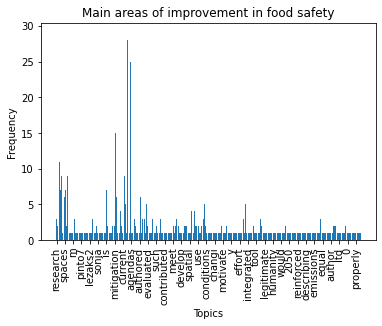

In [19]:
# Create bar plot
plt.bar(freq_count.keys(), freq_count.values())
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Main areas of improvement in food safety')
n = 10  # Display every nth value
x_ticks = list(freq_count.keys())[::n]  # Get every nth key as tick label
plt.xticks(x_ticks, rotation=90)

plt.show()

# 3. Global Food & Agriculture Statistics (csv file from Kaggle)

For this, I'm going to execute first-stage pre-processing, where the data is processed by eliminating any stop words, punctuation, and other irrelevant characters. I'm going to locate the most prevalent terms on the nations field, which gives me the top 10 countries that grow crops.

# Importing Libraries

In [20]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import multiprocessing

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the DataSet into Pandas DataFrame

In [40]:
crops_data = pd.read_csv('fao_data_crops_data.csv')
crops_data.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes


In [41]:
crops_data.tail()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
2255344,Fc,Calculated Data,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255345,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255346,NR,Not reported by country,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255347,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255348,*,Unofficial figure,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam


# Print out the type, Non-Null count, and name of each column

In [42]:
crops_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255349 entries, 0 to 2255348
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   country_or_area  object 
 1   element_code     object 
 2   element          object 
 3   year             float64
 4   unit             object 
 5   value            float64
 6   value_footnotes  object 
 7   category         object 
dtypes: float64(2), object(6)
memory usage: 137.7+ MB


# Create a list of stop words to remove

In [43]:
stop_words = set(stopwords.words('english'))

# Define a function to tokenize a single text string

In [44]:
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Tokenize the pre-processed text into individual words using NLTK and parallel processing

In [45]:
with multiprocessing.Pool() as pool:
    crops_data['country_or_area'] = pool.map(tokenize_text, crops_data['country_or_area'])

# Flatten the list of lists into a single list of words

In [46]:
words = [word for sublist in crops_data['country_or_area'] for word in sublist]

# Count the frequency of each word using Python's built-in Counter function

In [47]:
word_counts = Counter(words)

# Choose the top n words from the frequency count's descending order to determine which words are the most prevalent

In [48]:
n = 14
word_counts = Counter(words)
top_words = dict(word_counts.most_common(n))

# Remove unwanted words
for word in ['+', 'of', ',','and']:
    del top_words[word]

df = pd.DataFrame({'Country': list(top_words.keys()), 'Frequency': list(top_words.values())})

print(df)

     Country  Frequency
0       Asia     121542
1     Africa     120649
2   Republic     114363
3     Europe      89018
4    America      76422
5    Eastern      59314
6   Southern      54285
7    Western      53721
8  Countries      51559
9   Northern      49115


# Visualize the most prevalent words using a bar chart

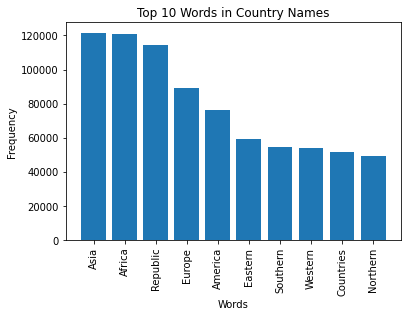

In [49]:
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Country Names'.format(n))
plt.show()